##  Un primer vistazo a la exploración de los dataframes

In [2]:
# Importamos las paqueterías

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt


In [3]:
# Leemos los dataframes 
dd_1 = pd.read_csv('C:/Users/julin/Documents/Git_Hub/Portafolio/Analisis_datos/Datasets/Coursera_courses.csv')
dd_2 = pd.read_csv('C:/Users/julin/Documents/Git_Hub/Portafolio/Analisis_datos/Datasets/Coursera_reviews.csv')
dd_3 = pd.read_csv('C:/Users/julin/Documents/Git_Hub/Portafolio/Analisis_datos/Datasets/edx_courses.csv',encoding='ISO 8859-1')
dd_4 = pd.read_csv('C:/Users/julin/Documents/Git_Hub/Portafolio/Analisis_datos/Datasets/udemy_courses.csv')
wordcloud_edx = pd.read_csv('C:/Users/julin/Documents/Git_Hub/Portafolio/Analisis_datos/Datasets/dd_3_sinnans.csv')

### Comenzaremos con el dataframe de la oferta de cursos de la plataforma Coursera

In [9]:
# Comenzamos con el EDA de Coursera
print("Existen {} filas y {} columnas en este dataset \n".format(dd_1.shape[0],dd_1.shape[1]))

print("Existen {} nombres de cursos online {}... \n".format(len(dd_1.name.unique()),
                                                                           ", ".join(dd_1.name.unique()[0:5])))

print("Existen {} instituciones que brindan sus servicios de cursos online {}... \n".format(len(dd_1.institution.unique()),
                                                                                      ", ".join(dd_1.institution.unique()[0:5])))

Existen 623 filas y 4 columnas en este dataset 

Existen 622 nombres de cursos online Machine Learning, Indigenous Canada, The Science of Well-Being, Technical Support Fundamentals, Become a CBRS Certified Professional Installer by Google... 

Existen 134 instituciones que brindan sus servicios de cursos online Stanford University, University of Alberta, Yale University, Google, Google - Spectrum Sharing... 



In [11]:
dd_1

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


In [37]:
# Agrupación de numero de cursos por institución

group1 = dd_1.groupby(by='institution', as_index=False).agg({'name': pd.Series.nunique})
ordenados = group1.sort_values('name',ascending=False)
ordenados.head(5)

,institution,name
118,University of Pennsylvania,43
115,University of Michigan,31
18,Duke University,24
31,Google Cloud,22
35,IBM,18


In [17]:
#Generamos el wordcloud
texto1 = " ".join(palabra for palabra in dd_1.name)

In [21]:
wordcloud1 = WordCloud(background_color="white").generate(texto1)

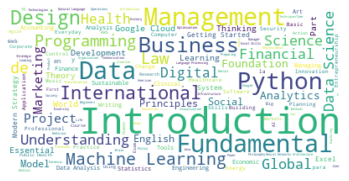

In [22]:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Conclusiones

* Las cinco instituciones que ofrecen más cursos son: University of Pennsylvania con 43; University of Michigan con	31; Duke University	con 24; Google Cloud con 22; IBM con 18.
* Según los datos obtenidos con el wordcloud Observamos que los cursos con mayor oferta son los introductorios acerca de habilidades relacionadas con TI, tales como Python, Machine Learning y Data.

### Hablemos ahora acerca del dataframe de las reviews de los cursos que ofrece la plataforma Coursera

In [17]:
# Comenzamos con el EDA de Coursera reviews
print("Existen {} filas y {} columnas en este dataset \n".format(dd_2.shape[0],dd_2.shape[1]))


Existen 1454711 filas y 5 columnas en este dataset 



In [43]:
# Agrupamos por fecha para graficar la cantidad de reviews por temporada que se pueden registrar

group2 = dd_2.groupby(by='date_reviews', as_index=False).agg({'rating': pd.Series.count})

,date_reviews,rating
0,"Apr 01, 2016",236
1,"Apr 01, 2017",289
2,"Apr 01, 2018",609
3,"Apr 01, 2019",839
4,"Apr 01, 2020",1651
...,...,...
1887,"Sep 30, 2016",308
1888,"Sep 30, 2017",342
1889,"Sep 30, 2018",495
1890,"Sep 30, 2019",893


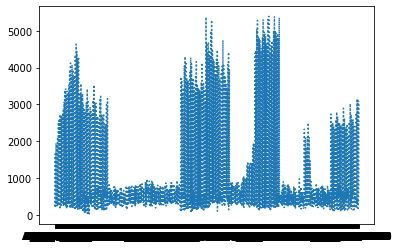

In [47]:
fig, ax = plt.subplots()
ax.plot(group2['date_reviews'],group2['rating'], ls = ":")
plt.show()

In [53]:
ordenados2 = group2.sort_values('rating',ascending=False)
ordenados2.head(500)

,date_reviews,rating
1366,"May 25, 2020",5394
1331,"May 18, 2020",5391
941,"Jun 01, 2020",5373
1396,"May 31, 2020",5359
1296,"May 11, 2020",5310
...,...,...
646,"Jan 04, 2020",656
965,"Jun 06, 2019",654
1385,"May 29, 2019",654
286,"Aug 24, 2019",653


In [13]:
 # Por las características de la columna reviews, crear un wordcloud resultaría poco necesario, puesto que con el rating nos es suficiente,
 # lo que si podemos hacer es calcular la media de reviews que deja cada persona en la plataforma

dd_2

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


In [6]:
#Agrupamos por puntuación
rating = dd_2.groupby('rating').count()
rating

,reviews,reviewers,date_reviews,course_id
rating,,,,
1,17350,17354,17354,17354
2,16185,16188,16188,16188
3,48292,48303,48303,48303
4,226667,226702,226702,226702
5,1146077,1146164,1146164,1146164


In [7]:
#Utilizamos la variable date reviews por ser la más estable

1146164/rating['date_reviews'].sum()

0.7878980773500716

In [15]:
cuenta = dd_2.groupby('reviewers').count()
cuenta['reviews'].mean()

5.053963058705804

#### Conclusiones

* Se puede observar que las reseñas son cíclicas, casi siempre durante el verano, por lo que se puede inferir que es la temporada alta de la toma de cursos.
* Podemos tomar como segunda inferencia que el pico de reseñas fue en 2020 justamente en un caso atípico de pandemia, lo cuál tiene sentido debido a las clases online.
* Los cursos con 5 estrellas representan el 78% de los cursos de la plataforma Coursera
* La media de cursos tomados por persona según la muestra que tenemos por el dataframe es de 5.

### Hablemos de la plataforma EDX

In [61]:
print("Existen {} filas y {} columnas en este dataset \n".format(dd_3.shape[0],dd_3.shape[1]))

Existen 975 filas y 16 columnas en este dataset 



In [60]:
dd_3.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980.0,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864.0,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...


In [62]:
#Eliminamos los nans de nuestra variable
dd_3new = dd_3[dd_3['n_enrolled'].notna()]

In [63]:
# Agruparemos la cantidad de estudiantes por institución, por lenguaje y por nivel

group3_inst = dd_3.groupby(by='institution', as_index=False).agg({'title': pd.Series.count})
group3_lan = dd_3new.groupby(by='language', as_index=False).agg({'n_enrolled': pd.Series.sum})
group3_Lev = dd_3new.groupby(by='Level', as_index=False).agg({'n_enrolled': pd.Series.sum})

In [65]:
#Obtenemos las universidades con mayor oferta de cursos
ordenados3_inst = group3_inst.sort_values('title',ascending=False)
ordenados3_inst.head(10)

,institution,title
25,Harvard University,104
85,Universitat Politï¿½ï¿½ï¿½ï¿½ï¿½ï¿½c,47
39,Massachusetts Institute of Technology,41
17,Delft University of Technology,30
26,IBM,30
32,Inter-American Development Bank,29
70,The University of Queensland,26
68,The University of Michigan,22
55,Tecnolï¿½ï¿½ï¿½ï¿½ï¿½ï¿½g,21
10,Columbia University,20


In [66]:
#Obtenemos los lenguajes con el mayor número de inscritos

ordenados3_lan = group3_lan.sort_values('n_enrolled',ascending=False)
ordenados3_lan

,language,n_enrolled
1,English,41215599.0
2,Espaï¿½ï,3704975.0
4,Italiano,281585.0
3,Franï¿½ï¿,161848.0
7,ýýýýýýýýý,62757.0
6,ýýýýýý,56158.0
5,Portuguï¿½,44021.0
0,Deutsch,10657.0


In [67]:
#Obtenemos el nivel con mayor número de inscritos
ordenados3_lev = group3_Lev.sort_values('n_enrolled',ascending=False)
ordenados3_lev

,Level,n_enrolled
2,Introductory,32379441.0
1,Intermediate,10159138.0
0,Advanced,2999021.0


In [73]:
#Creamos el wordcloud para los titulos de los cursos

texto2 = " ".join(palabra for palabra in wordcloud_edx.title)

In [76]:
wordcloud2 = WordCloud(background_color="white").generate(texto2)

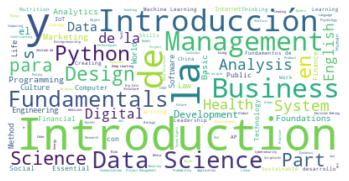

In [77]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Conclusiones
* Harvard es la institución con mayor oferta educativa.
* Inglés, Español e Italiano son los idiomas con más alumnos inscritos.
* El nivel introductorio es el que contiene el mayor número de alumnos.
* La palabra más repetida dentro de los títulos es 'Introduction' lo cuál refleja los resultados anteriores y refleja causalidad, al haber mayor oferta de cursos introductorios en inglés.

### Hablemos de la plataforma UDEMY

In [4]:
print("Existen {} filas y {} columnas en este dataset \n".format(dd_4.shape[0],dd_4.shape[1]))

Existen 3678 filas y 12 columnas en este dataset 



In [5]:
dd_4.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [9]:
#Procederemos a agrupar el dataset por materia, nivel y precio


group4_mat = dd_4.groupby(by='subject', as_index=False).agg({'course_title': pd.Series.count})
group4_niv = dd_4.groupby(by='level', as_index=False).agg({'course_title': pd.Series.count})
group4_prec = dd_4.groupby(by='price', as_index=False).agg({'course_title': pd.Series.count})

<BarContainer object of 4 artists>

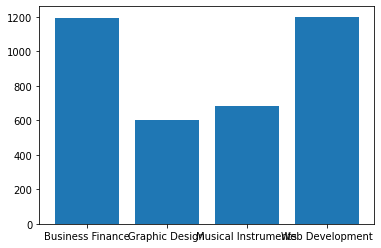

In [10]:
plt.bar(group4_mat['subject'],group4_mat['course_title'])

<BarContainer object of 4 artists>

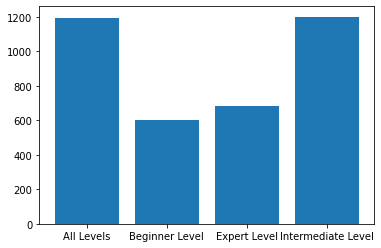

In [11]:
plt.bar(group4_niv['level'],group4_mat['course_title'])

In [17]:
ordenado_prec = group4_prec.sort_values('course_title',ascending=False)
ordenado_prec.head(5)

,price,course_title
1,20,830
7,50,468
0,0,310
37,200,295
5,40,217


In [25]:
media=ordenado_prec[ordenado_prec['price']<200]

In [31]:
295/media['course_title'].sum()

0.08720070942950044

In [18]:
#Comenzamos con la creación de wordcloud para los títulos

texto3 = " ".join(palabra for palabra in dd_4.course_title)

In [19]:
wordcloud3 = WordCloud(background_color="white").generate(texto3)

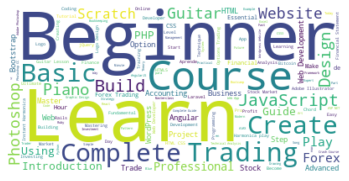

In [21]:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Conclusiones
* Las materias de IT en development y las de finanzas y negocios son el gran hit de esta página.
* Los niveles predominantes son: apto para todos e intermedio.
* Los cursos con un precio por encima de doscientas unidades monetarias representan el 8% de la totalidad de la oferta académica.
* A conclusión del wordcloud, esta plataforma parece estar enfocada a quienes dan sus primeros pasos en las herramientas digitales financieras o de desarrollo.